# Session assignments
Interactively determines the assignments of presentations to sessions.

## Paths and parameters

In [7]:
# Division to analyze 
division = 'dcb_dvm'

# Presentations ('talks' or 'posters')
presentation_type = 'talks'

# Minimum and maximum number of presentations per session
min_size = 6
max_size = 8

# Import outside packages
import os, sys
import pandas as pd

# Mount Google Drive, if running on Google Colab
if 'COLAB_GPU' in os.environ:
    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

    # Set the data root to a Google Drive folder
    data_root = '/content/drive/MyDrive/meeting_planning_2024/' + division 
    code_root = '/content/drive/MyDrive/Colab Notebooks/conference_planner'

    # Add code to path
    sys.path.append(code_root)

# If running locally, set the data root
else:
    # Set paths
    code_root = '/Users/mmchenry/Documents/code/conference_planner'
    data_root = '/Users/mmchenry/Documents/Projects/meeting_planner_2024/division_files/' + division

# Custom packages
import make_sessions as ms
# import preprocessing as pp
import compile_program as cp
# mtg_year  = 2024
# # Check paths and create directories
# source_data_dir, inter_data_dir, output_data_dir = pp.setup_dirs(data_root, code_root, mtg_year)
# # Abstract data file  (an xlsx file, downloaded from X-CD)
# abstract_filename = 'abstracts_123852'

# Load abstract data for presentation type
in_path = os.path.join(data_root,  presentation_type + '_ratings.csv')
df = pd.read_csv(in_path)

# Clear out any previous assignments
df['session_num']   = None
df['talk_num']      = None
df['major_branch']  = None

# Adjust table display setting 
pd.set_option('display.max_colwidth', None)

# Clustering and session making
Creates a phylogeny (i.e., dendrogram) of relationships between talks and defines the major branches, using the distance threshold. 
Each branch is characterized by its top keywords. 
Finally, each branch is divided into sessions of 6-8 talks that are in an optimal order by their keyword ratings.

Fused cluster A with B
Fused cluster C with D
Fused cluster F with G
Fused cluster H with I
Fused cluster J with K
Fused cluster L with M
Fused cluster N with O
Fused cluster P with Q
Fused cluster R with S
Fused cluster T with U
Fused cluster V with W
Fused cluster X with Y
Fused cluster Z with Y


,Branch,Number of Talks,Top Keywords
0,B,24,"['animal', 'functional_morphology', 'behavior', 'motor_control', 'kinematics', 'ecomorphology', 'swimming', 'fish', 'biomimetics']"
1,D,24,"['animal', 'functional_morphology', 'behavior', 'ecomorphology', 'motor_control', 'kinematics', 'structures', 'feeding', 'swimming']"
2,E,15,"['animal', 'functional_morphology', 'ecomorphology', 'behavior', 'muscle', 'motor_control', 'walking', 'kinematics', 'swimming']"
3,G,26,"['animal', 'functional_morphology', 'ecomorphology', 'muscle', 'behavior', 'fish', 'structures', 'swimming', 'motor_control']"
4,I,24,"['animal', 'functional_morphology', 'behavior', 'ecomorphology', 'motor_control', 'kinematics', 'swimming', 'fluid_dynamics', 'fish']"
5,K,25,"['animal', 'functional_morphology', 'ecomorphology', 'behavior', 'motor_control', 'swimming', 'muscle', 'structures', 'kinematics']"
6,M,21,"['animal', 'functional_morphology', 'kinematics', 'behavior', 'muscle', 'motor_control', 'ecomorphology', 'sensing', 'swimming']"
7,O,30,"['animal', 'functional_morphology', 'ecomorphology', 'behavior', 'kinematics', 'motor_control', 'walking', 'swimming', 'skulls']"
8,Q,23,"['animal', 'functional_morphology', 'behavior', 'ecomorphology', 'kinematics', 'motor_control', 'swimming', 'fish', 'feeding']"
9,S,23,"['animal', 'functional_morphology', 'ecomorphology', 'behavior', 'motor_control', 'fluid_dynamics', 'kinematics', 'swimming', 'feeding']"


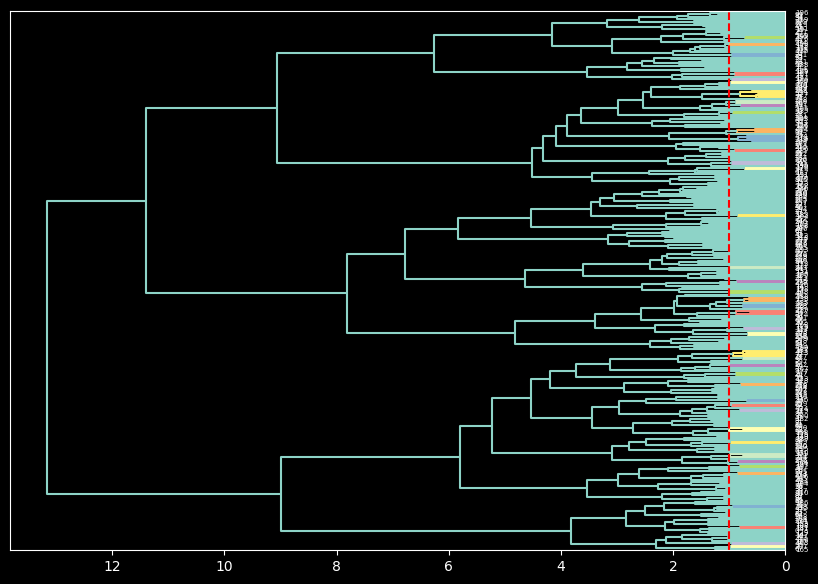

In [9]:
# Run initial clustering
df, distance_threshold = ms.run_hierarchical(df, min_size=min_size, max_size=max_size)

# Summarize the major keywords for each branch
branch_summ = ms.summarize_branch_keywords(df,num_keywords=9)

# Plot dendrogram
ms.plot_dendrogram(df, distance_threshold)

# Create sessions of talks that are similar to each other
df = ms.process_each_branch(df, min_size=min_size, max_size=max_size, echo=False)


## Output divisional program

In [15]:
# Make complete dataframe for the division
df_full = cp.load_div_dataframe(df, data_root)

# Output divisional schedule to html
cp.render_div_schedule_html(df_full, data_root, presentation_type, include_summary=True)

Schedule written to /Users/mmchenry/Documents/Projects/meeting_planner_2024/division_files/dcb_dvm/talks.html
Copy and paste path into a web browser
